## What are the machine learning models?

### The model is the core component of machine learning, designed to make predictions or decisions. Unlike traditional models built using human knowledge, machine learning models are shaped by data and improve by learning from experience.

### A model can be thought of as a function. It takes input data and produces an output. The input and output are data and not part of model itself.

### Choosing a model is the first step in machine learning. Simpler models are easier to understand and reliable while complex ones can achieve more but are harder to interpret. After selecting a model's logical structure (not parameter value), its parameters are set through training where initial random guesses are automatically adjusted to improve predictions. 


In [1]:
import pandas as pd 

data = pd.read_csv('doggy-boot-harness.csv')
data.head()

,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


In [ ]:
# load a library to do the hard work for us

import statsmodels.formula.api as smf

# First, we define our formula using a special syntax
# This says that boot size is explained by harness size

formula = "boot_size ~ harness_size"

# Create the model, but dont train it yet
model = smf.ols(formula = formula, data = data)

# Note that we have created our model but it does not have internal parameters set yet
if not hasattr(model, 'params'):
    print('Model selected but it does not have parameters set. We need to train it!')


Model selected but it does not have parameters set. We need to train it!


# Train our model
### OLS models have two parameters (a slope and an offset), but these have not been set in our model yet. We need to train(fit) our model to find these values so that the model can reliably estimate dogs boot size based on their harness size.

In [4]:
fitted_model = model.fit()

# Print information about our model now it has been fit

print('The following model parameters have been found: \n'+ 
        f'Line slope: {fitted_model.params[1]}\n'+
        f'Line intercept: {fitted_model.params[0]}')


The following model parameters have been found: 
Line slope: 0.5859254167382709
Line intercept: 5.719109812682601


/var/folders/lz/9ztyyq913n1_6xkj9g8_jlg40000gn/T/ipykernel_3418/1071451097.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'Line slope: {fitted_model.params[1]}\n'+
/var/folders/lz/9ztyyq913n1_6xkj9g8_jlg40000gn/T/ipykernel_3418/1071451097.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'Line intercept: {fitted_model.params[0]}')


/var/folders/lz/9ztyyq913n1_6xkj9g8_jlg40000gn/T/ipykernel_3418/1664344293.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(data['harness_size'], fitted_model.params[1] * data['harness_size'] + fitted_model.params[0])
/var/folders/lz/9ztyyq913n1_6xkj9g8_jlg40000gn/T/ipykernel_3418/1664344293.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


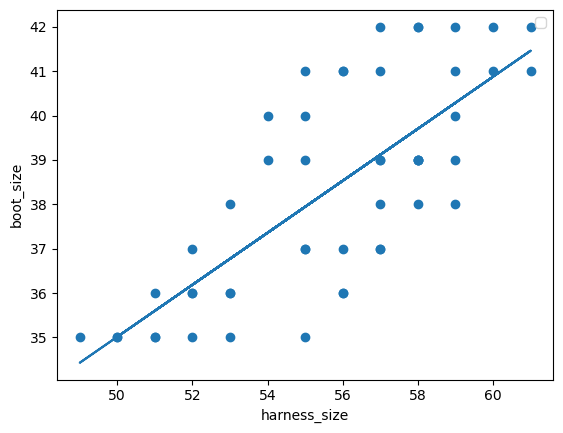

In [9]:
import matplotlib.pyplot as plt

plt.scatter(data['harness_size'], data['boot_size'])
plt.plot(data['harness_size'], fitted_model.params[1] * data['harness_size'] + fitted_model.params[0])
plt.xlabel('harness_size')
plt.ylabel('boot_size')
plt.legend()

In [10]:
# Use the Model

harness_size = {'harness_size': [52.5]}

approximate_boot_size = fitted_model.predict(harness_size)

print('Estimated approximate boot size: ')
print(approximate_boot_size)

Estimated approximate boot size: 
0    36.480194
dtype: float64
